In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several help ful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-dataset/train-images.idx3-ubyte
/kaggle/input/mnist-dataset/t10k-labels.idx1-ubyte
/kaggle/input/mnist-dataset/t10k-images.idx3-ubyte
/kaggle/input/mnist-dataset/train-labels.idx1-ubyte
/kaggle/input/mnist-dataset/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte
/kaggle/input/mnist-dataset/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte
/kaggle/input/mnist-dataset/train-labels-idx1-ubyte/train-labels-idx1-ubyte
/kaggle/input/mnist-dataset/train-images-idx3-ubyte/train-images-idx3-ubyte


In [2]:
# layers -> (i/p layer 784 nodes) (128 nodes in hidden layer1) (10 nodes in o/p layer 0-9)

In [3]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [4]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [5]:
x_train.shape # 60k images, each of 28*28

(60000, 28, 28)

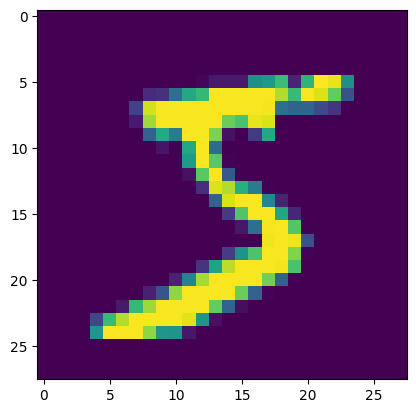

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [7]:
x_train = x_train/255
x_test = x_test/255 # in range (0-1)

In [8]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam')

In [11]:
history = model.fit(x_train,y_train,epochs=5,validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 6s 3ms/step - loss: 0.2841 - val_loss: 0.1500
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1260 - val_loss: 0.1124
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0864 - val_loss: 0.0962
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0632 - val_loss: 0.0953
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0499 - val_loss: 0.0848


In [12]:
y_prob = model.predict(x_test)

313/313 [==============================] - 1s 1ms/step


In [13]:
y_prob.argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6])

In [14]:
y_prob # prob of 0,1,2,...9

array([[1.69513171e-07, 1.28855049e-09, 6.48326341e-06, ...,
        9.98743474e-01, 2.50974631e-06, 6.78700599e-06],
       [1.50278847e-08, 5.72618563e-04, 9.99421000e-01, ...,
        3.82448283e-12, 2.96033613e-06, 8.94786564e-14],
       [1.75179980e-06, 9.95496213e-01, 2.43475341e-04, ...,
        2.23635207e-03, 1.30581681e-03, 2.54344995e-05],
       ...,
       [1.02940529e-11, 1.30363359e-10, 3.66682136e-11, ...,
        5.15649299e-06, 1.80134748e-06, 1.50135866e-05],
       [1.51303645e-08, 4.19892038e-10, 1.27461045e-11, ...,
        1.42078278e-07, 7.31942855e-05, 2.32846498e-09],
       [3.80767684e-09, 2.18432484e-14, 3.01139647e-09, ...,
        5.71564237e-12, 1.06650466e-09, 5.78875003e-10]], dtype=float32)

In [15]:
y_pred = y_prob.argmax(axis=1)

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9768

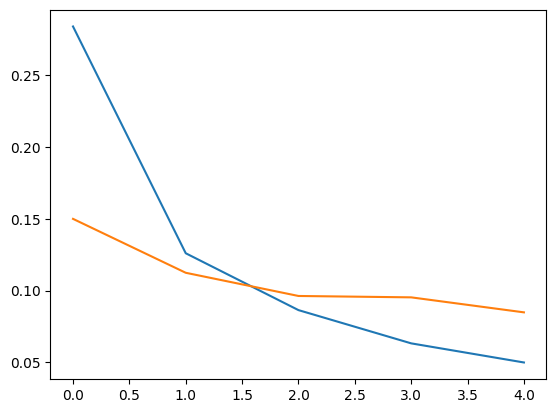

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [18]:
model.predict(x_test[6].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 22ms/step


array([4])

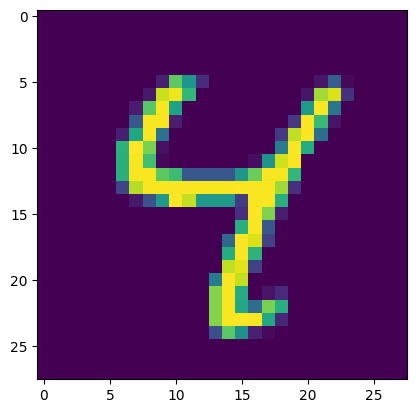

In [19]:
plt.imshow(x_test[6])